# IoT

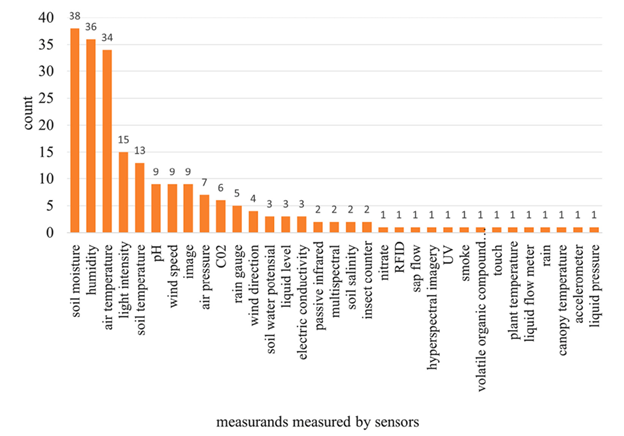

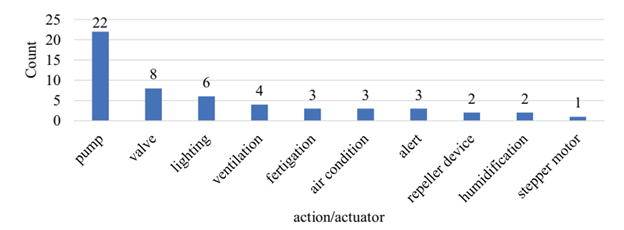

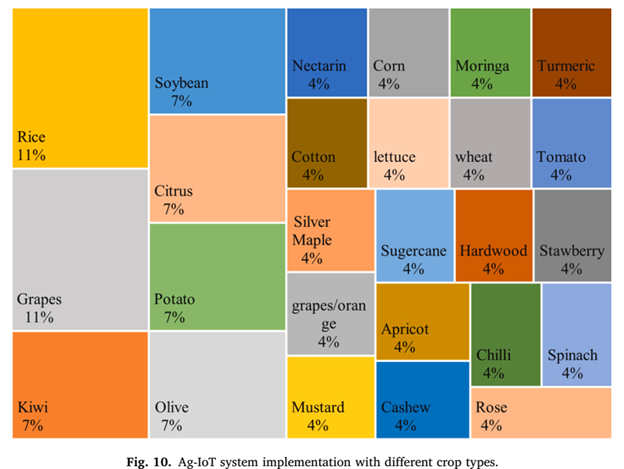

# 传感器需求列表

<table>
<tbody>
<tr>
<td>传感器类型</td>
<td>说明</td>
<td>优先级</td>
</tr>
<tr>
<td>近景光学传感器(可见光、红外、紫外)</td>
<td>株高、植株密度、叶片角度，植物器官计数（叶，果实，花），叶绿素浓度、叶片病虫害、营养不良等</td>
<td>高（农业专家对长势的判断目前主要依赖外观）</td>
</tr>
<tr>
<td>远景光学传感器（无人机、高光谱）</td>
<td>叶面积指数（LAI）、植被指数（NDVI）、NDRE(red-edge NDVI)： 定量分析作物密度、氮和水的欠缺程度</td>
<td>低</td>
</tr>
<tr>
<td>小型气象工作站</td>
<td>空气温湿度、雨量、光照、风速、风向、气压/海拔</td>
<td>高</td>
</tr>
<tr>
<td>气孔导度仪</td>
<td>气孔导度（stomata conductance)，，考虑作为定期检测数据纳入管理</td>
<td>低</td>
</tr>
<tr>
<td>墒情传感器</td>
<td>土壤含水量（soil volumetric water content，VWC）、土壤温度、土壤pH值（影响养分的溶解度和吸收）、土壤盐度（电导率）、土壤养分、氧气（O2）、二氧化碳（CO2）、甲烷（CH4）</td>
<td>高</td>
</tr>
<tr>
<td>O2、CO2传感器</td>
<td>仅温室用，和CO2释放、通风等使能器联动使用</td>
<td>低（以户外场景为主）</td>
</tr>
<tr>
<td>乙烯传感器</td>
<td>果实成熟度检测</td>
<td>低（仅适用于果实类药材）</td>
</tr>
<tr>
<td>氮磷钾</td>
<td>每个种植周期/季度检测一次，考虑集成数据</td>
<td>中</td>
</tr>
<tr>
<td>GPS</td>
<td>经纬度</td>
<td>高</td>
</tr>
<tr>
<td>展示需求</td>
<td>提供实时（滚动式展示） 和 综合（整个种植周期汇总展示）两种视图</td>
</tr>
<tr>
<td>数据结构需求</td>
<td>一次检测包括：[传感器类型sensor_type, 传感器ID sensor_id, 值value, 单位unit, 时间time, 经纬度loc]</td>
<td>值为数值或影像</td>
</tr>
</tbody>
</table>

# Installing ThingsBoard on Windows

http://research.qsi.life/research/iot

# Installing ThingsBoard using Docker (Windows)

Windows users should use docker managed volume (a Docker data volume persists after you delete a container) for ThingsBoard DataBase. Create docker volume (for ex. mytb-data) before executing docker run command: Open “Docker Quickstart Terminal”. Execute the following command to create docker volume:  

ThingsBoard is able to use various messaging systems/brokers for storing the messages and communication between ThingsBoard services. How to choose the right queue implementation?

    In Memory queue implementation is built-in and default. It is useful for development(PoC) environments and is not suitable for production deployments or any sort of cluster deployments.

    Kafka is recommended for production deployments. This queue is used on the most of ThingsBoard production environments now. It is useful for both on-prem and private cloud deployments. It is also useful if you like to stay independent from your cloud provider. However, some providers also have managed services for Kafka. See AWS MSK for example.

    RabbitMQ is recommended if you don’t have much load and you already have experience with this messaging system.


docker-compose.yml

    version: '3.0'
    services:
      mytb:
        restart: always
        image: "thingsboard/tb-postgres"
        ports:
          - "8080:9090"
          - "1883:1883"
          - "7070:7070"
          - "5683-5688:5683-5688/udp"
        environment:
          TB_QUEUE_TYPE: in-memory
        volumes:
          - mytb-data:/data
          - mytb-logs:/var/log/thingsboard
    volumes:
      mytb-data:
        external: true
      mytb-logs:
        external: true


    Where:

        8080:9090 - connect local port 8080 to exposed internal HTTP port 9090
        1883:1883 - connect local port 1883 to exposed internal MQTT port 1883
        7070:7070 - connect local port 7070 to exposed internal Edge RPC port 7070
        5683-5688:5683-5688/udp - connect local UDP ports 5683-5688 to exposed internal COAP and LwM2M ports
        ~/.mytb-data:/data - mounts the host’s dir ~/.mytb-data to ThingsBoard DataBase data directory
        ~/.mytb-logs:/var/log/thingsboard - mounts the host’s dir ~/.mytb-logs to ThingsBoard logs directory
        mytb - friendly local name of this machine
        restart: always - automatically start ThingsBoard in case of system reboot and restart in case of failure.
        image: thingsboard/tb-postgres - docker image, can be also thingsboard/tb-cassandra or thingsboard/tb
        
开通主机的8080，1883，7070，5683-5688端口

access: http://localhost:8080/

初始用户名：sysadmin@thingsboard.org  
密码：sysadmin

# Raspberry Pi GPIO control over MQTT using ThingsBoard

https://thingsboard.io/docs/samples/raspberry/gpio/


## MQTT中的QoS等级

MQTT设计了一套保证消息稳定传输的机制，包括消息应答、存储和重传。在这套机制下，提供了三种不同层次QoS（Quality of Service）：

    QoS0，At most once，至多一次；
    QoS1，At least once，至少一次；
    QoS2，Exactly once，确保只有一次。

QoS 是消息的发送方（Sender）和接受方（Receiver）之间达成的一个协议：

    QoS0 代表，Sender 发送的一条消息，Receiver 最多能收到一次，也就是说 Sender 尽力向 Receiver 发送消息，如果发送失败，也就算了；
    QoS1 代表，Sender 发送的一条消息，Receiver 至少能收到一次，也就是说 Sender 向 Receiver 发送消息，如果发送失败，会继续重试，直到 Receiver 收到消息为止，但是因为重传的原因，Receiver 有可能会收到重复的消息；
    QoS2 代表，Sender 发送的一条消息，Receiver 确保能收到而且只收到一次，也就是说 Sender 尽力向 Receiver 发送消息，如果发送失败，会继续重试，直到 Receiver 收到消息为止，同时保证 Receiver 不会因为消息重传而收到重复的消息。

    注意：
    QoS是Sender和Receiver之间的协议，而不是Publisher和Subscriber之间的协议。换句话说，Publisher发布了一条QoS1的消息，只能保证Broker能至少收到一次这个消息；而对于Subscriber能否至少收到一次这个消息，还要取决于Subscriber在Subscibe的时候和Broker协商的QoS等级。

## Run emulate.js to periodically send simulated sensor data

Install node.js.  
npm install mqtt  
node emulate.js

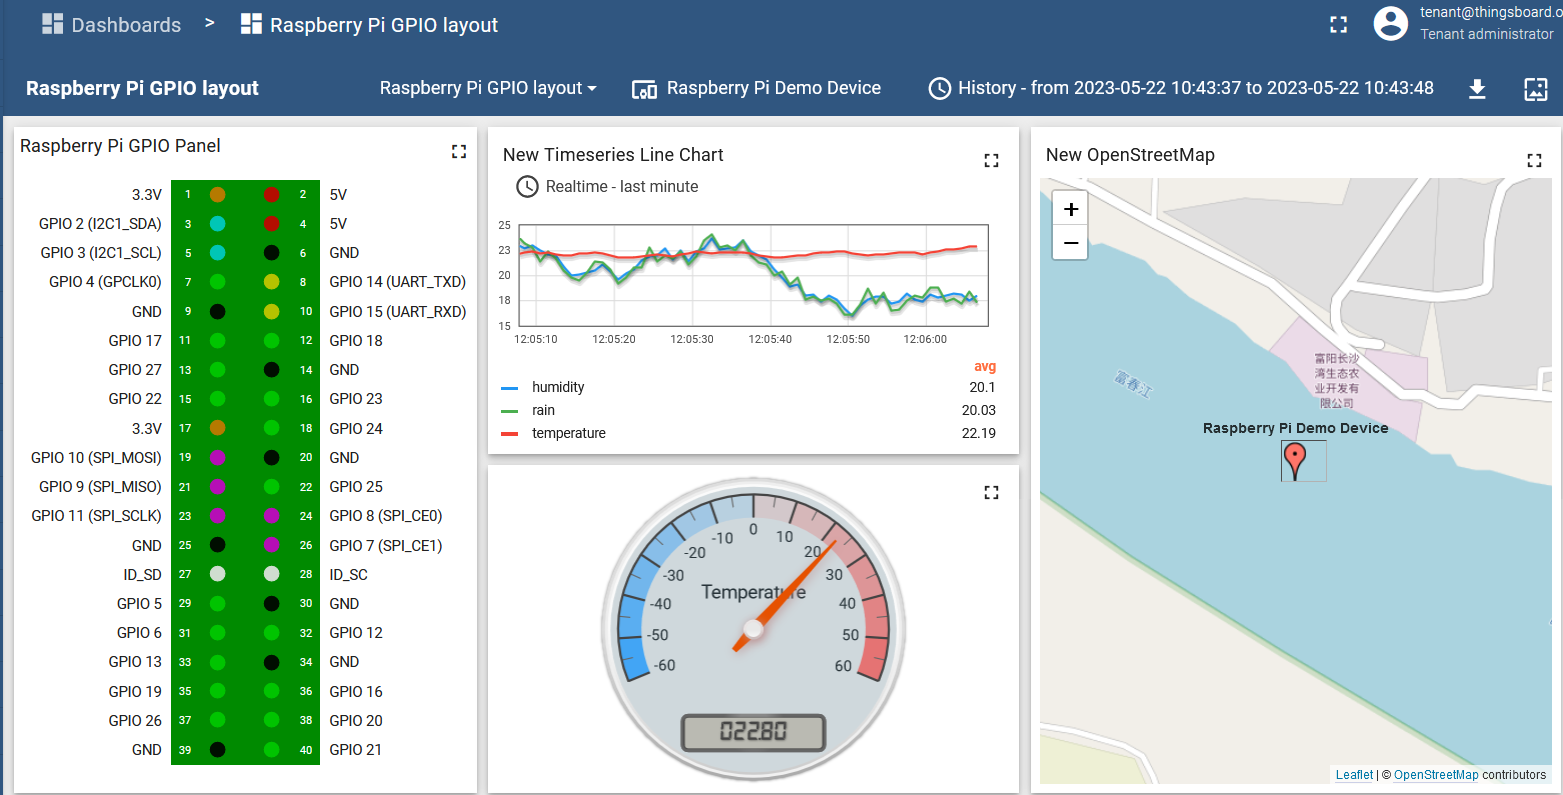

# Rule Chains

实现了业务逻辑的分离

ThingsBoard Rule Engine is a highly customizable and configurable system for complex event processing. With rule engine you are able to filter, enrich and transform incoming messages originated by IoT devices and related assets.

“规则链是嵌入在应用程序中的组件，实现了将业务决策从应用程序代码中分离出来，并使用预定义的语义模块编写业务决策。接受数据输入，解释业务规则，并根据业务规则做出业务决策。”

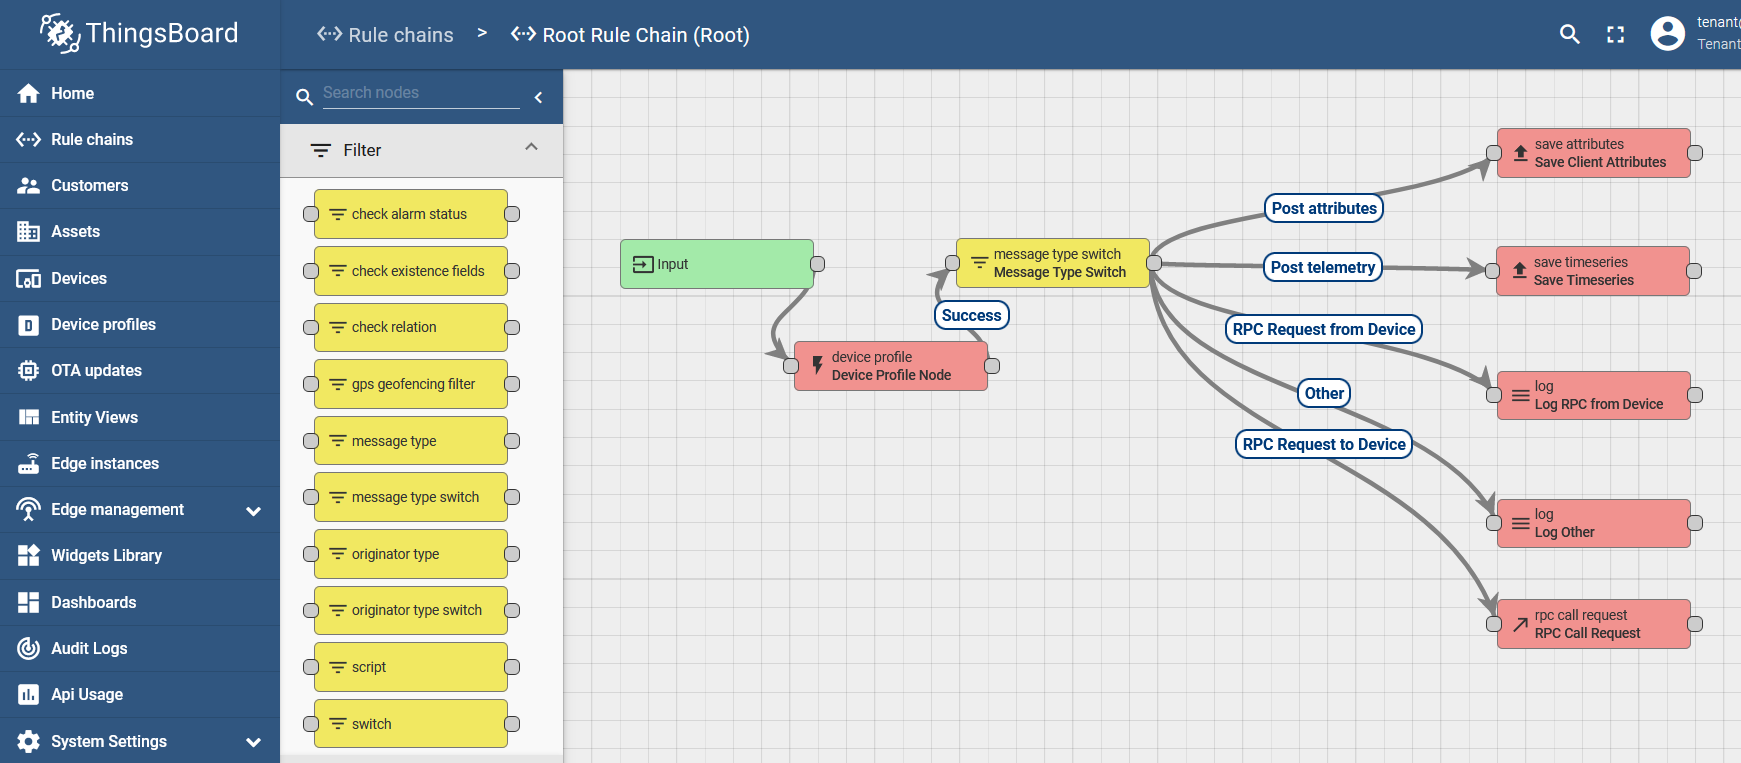

----

# Appendix - ThingsBoard official README 


## Documentation

ThingsBoard documentation is hosted on [thingsboard.io](https://thingsboard.io/docs).

## IoT use cases

[**Smart energy**](https://thingsboard.io/smart-energy/)
[![Smart energy](https://user-images.githubusercontent.com/8308069/152984256-eb48564a-645c-468d-912b-f554b63104a5.gif "Smart energy")](https://thingsboard.io/smart-energy/)

[**Fleet tracking**](https://thingsboard.io/fleet-tracking/)
[![Fleet tracking](https://user-images.githubusercontent.com/8308069/152984528-0054ed55-8b8b-4cda-ba45-02fe95a81222.gif "Fleet tracking")](https://thingsboard.io/fleet-tracking/)

[**Smart farming**](https://thingsboard.io/smart-farming/)
[![Smart farming](https://user-images.githubusercontent.com/8308069/152984443-a98b7d3d-ff7a-4037-9011-e71e1e6f755f.gif "Smart farming")](https://thingsboard.io/smart-farming/)

[**IoT Rule Engine**](https://thingsboard.io/docs/user-guide/rule-engine-2-0/re-getting-started/)
[![IoT Rule Engine](https://thingsboard.io/images/demo/send-email-rule-chain.gif "IoT Rule Engine")](https://thingsboard.io/docs/user-guide/rule-engine-2-0/re-getting-started/)

[**Smart metering**](https://thingsboard.io/smart-metering/)
[![Smart metering](https://user-images.githubusercontent.com/8308069/31455788-6888a948-aec1-11e7-9819-410e0ba785e0.gif "Smart metering")](https://thingsboard.io/smart-metering/)

## Getting Started

Collect and Visualize your IoT data in minutes by following this [guide](https://thingsboard.io/docs/getting-started-guides/helloworld/).


## Licenses

This project is released under [Apache 2.0 License](./LICENSE).

The PE version supports white label.

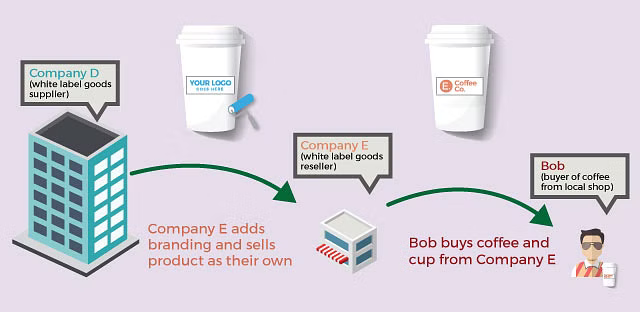